In [85]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns



In [95]:
data = pd.read_csv(r"C:\Users\vaishu\Desktop\IITH\assignments\PRML\Dataset\BTC-USD.csv")

data.head()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [96]:
# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.info()
# Split data into train and test sets
train_size = int(len(data) * 0.9)
train_data, test_data = data[:train_size], data[train_size:]
X = train_data[['Open', 'High', 'Low', 'Adj_Close', 'Volume']]
y = train_data['Close']
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
test_X=test_data[['Open', 'High', 'Low', 'Adj_Close', 'Volume']]
test_y = test_data['Close']

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2713 entries, 2014-09-17 to 2022-02-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2713 non-null   float64
 1   High       2713 non-null   float64
 2   Low        2713 non-null   float64
 3   Close      2713 non-null   float64
 4   Adj_Close  2713 non-null   float64
 5   Volume     2713 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 148.4 KB


In [97]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
rf_pred = rf_model.predict(val_X)

25.927166893288987


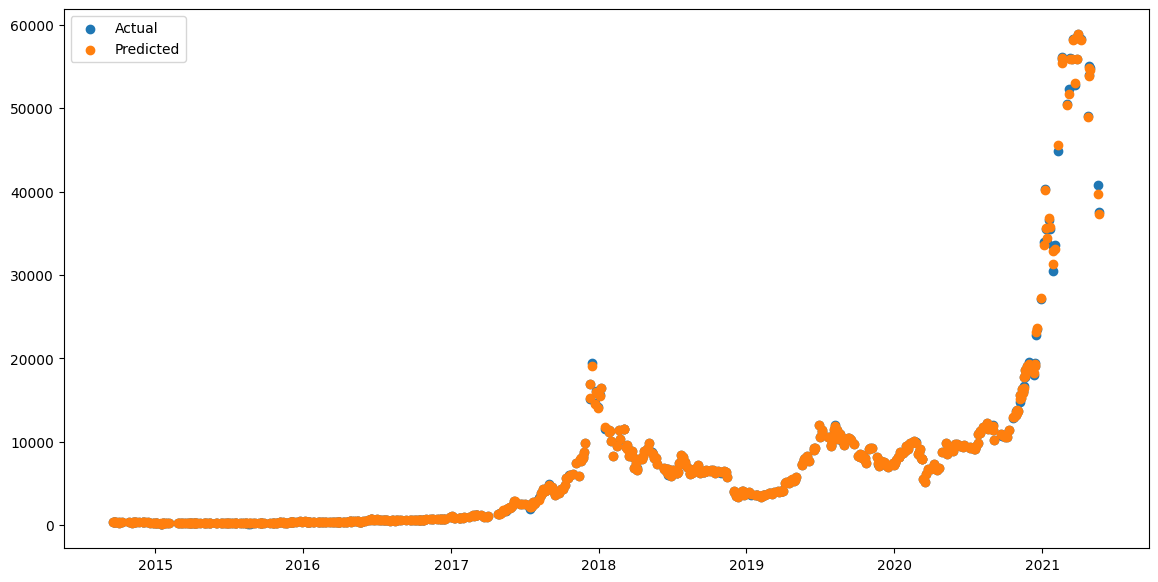

In [107]:
from sklearn.metrics import mean_absolute_error
rf_val_mae = mean_absolute_error(val_y,rf_pred)
print(rf_val_mae)
plt.figure(figsize=(14, 7))
plt.scatter(val_X.index, val_y, label='Actual')
plt.scatter(val_X.index, rf_pred, label='Predicted')
plt.legend()
plt.show()

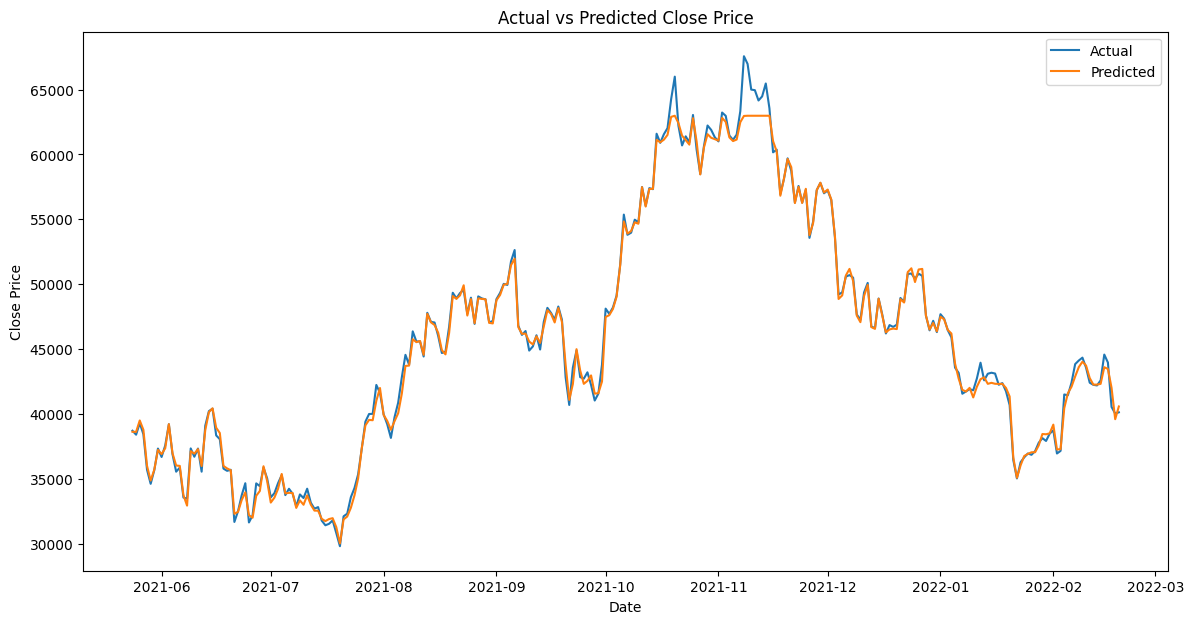

In [99]:
# Plot the actual vs predicted values
pred = rf_model.predict(test_X)
plt.figure(figsize=(14, 7))
plt.plot(test_X.index, test_y, label='Actual')
plt.plot(test_X.index, pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.show()

In [103]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_y,pred))
print(f"Random Forest RMSE: {rmse}")
mae = mean_absolute_error(test_y,pred)
print(mae)

Random Forest RMSE: 631.295485865276
364.234933490545


In [104]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Mean Absolute Error (MAE)
mae = mean_absolute_error(test_y, pred)

# Mean Squared Error (MSE)
mse = mean_squared_error(test_y, pred)

# Root Mean Square Error (RMSE)
rmse = np.sqrt(mse)

# Mean Absolute Percentage Error (MAPE)
# Add a small epsilon to avoid division by zero
epsilon = 1e-10
mape = np.mean(np.abs((test_y - pred) / (test_y + epsilon))) * 100

# Symmetric Mean Absolute Percentage Error (sMAPE)
smape = np.mean(2 * np.abs(test_y - pred) / (np.abs(test_y) + np.abs(pred) + epsilon)) * 100

# Print all metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Symmetric Mean Absolute Percentage Error (sMAPE): {smape:.2f}%")


Mean Absolute Error (MAE): 364.23
Mean Squared Error (MSE): 398533.99
Root Mean Square Error (RMSE): 631.30
Mean Absolute Percentage Error (MAPE): 0.79%
Symmetric Mean Absolute Percentage Error (sMAPE): 0.79%
